Available columns in CSV: ['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result']

Dataset shape after dropping missing values: (297, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    1  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  

Training set shape: (237, 13)
Test set shape: (60, 13)

1. Decision Tree (Gini, default): Accuracy = 0.7833333333333333


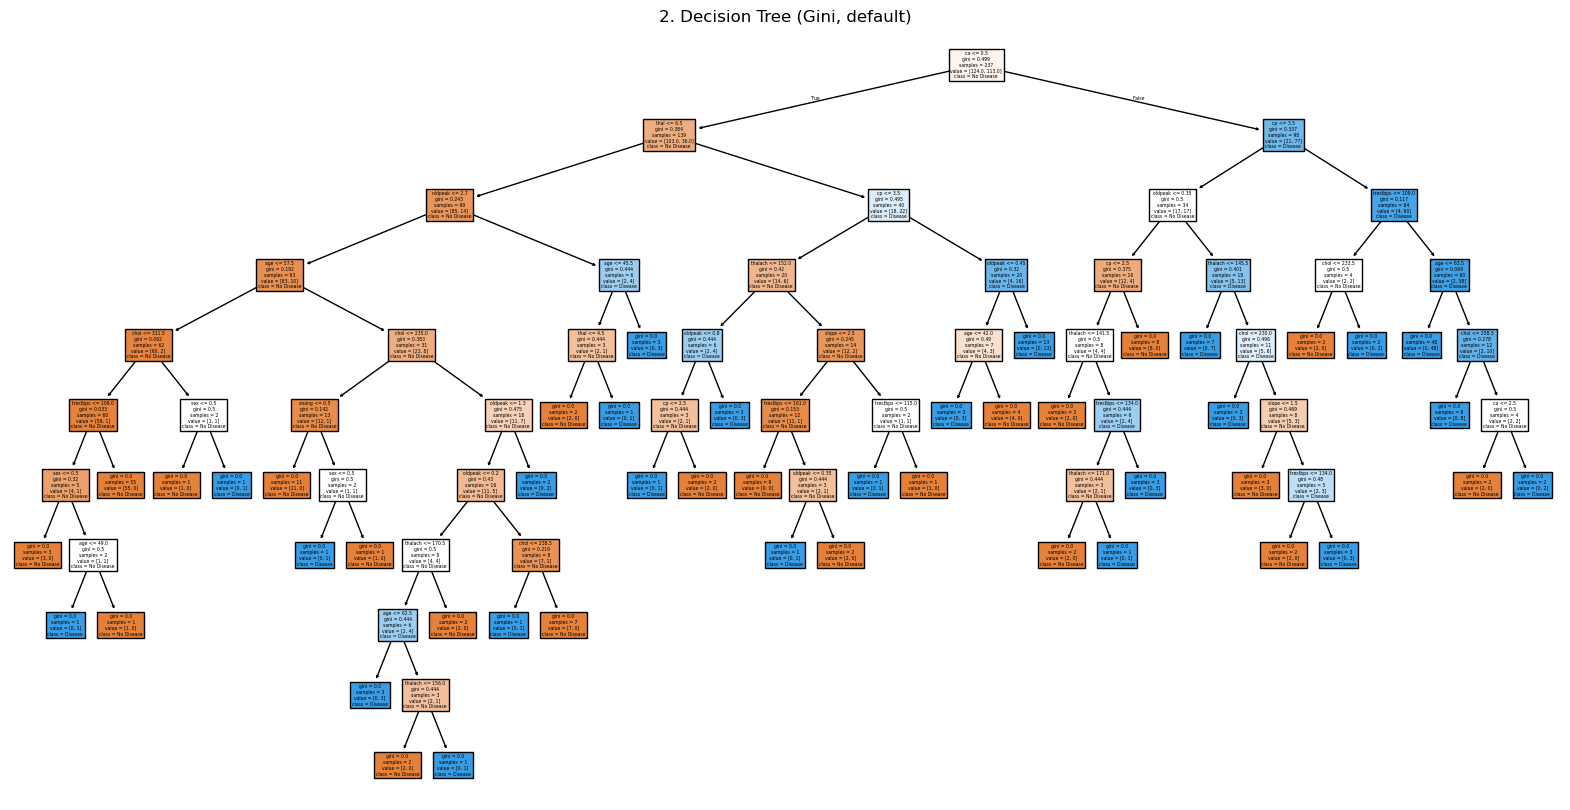

3. Decision Tree (Gini, max_depth=3): Accuracy = 0.7833333333333333


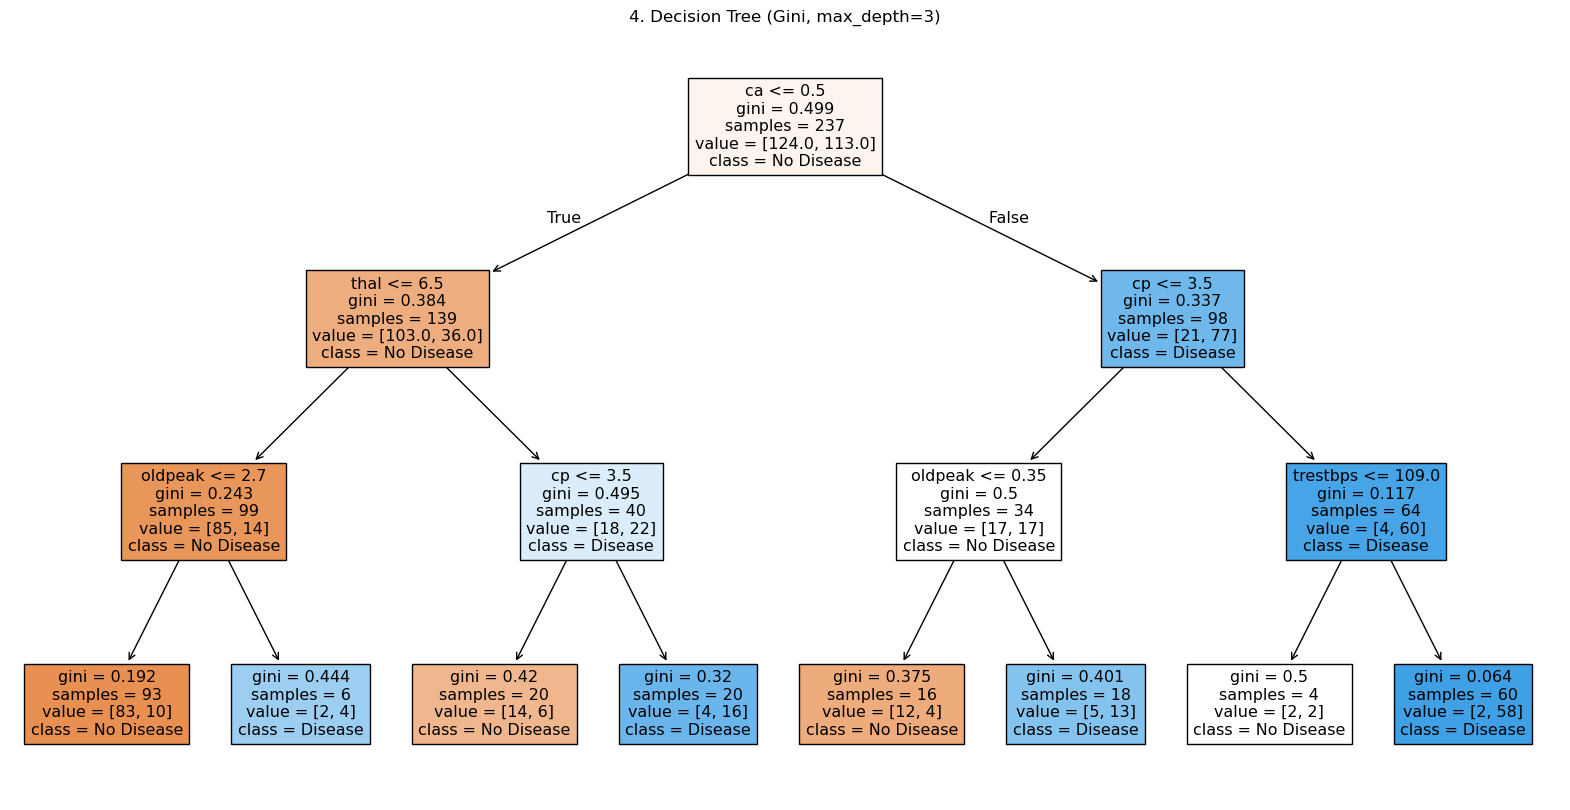

5. Decision Tree (Entropy): Accuracy = 0.7833333333333333


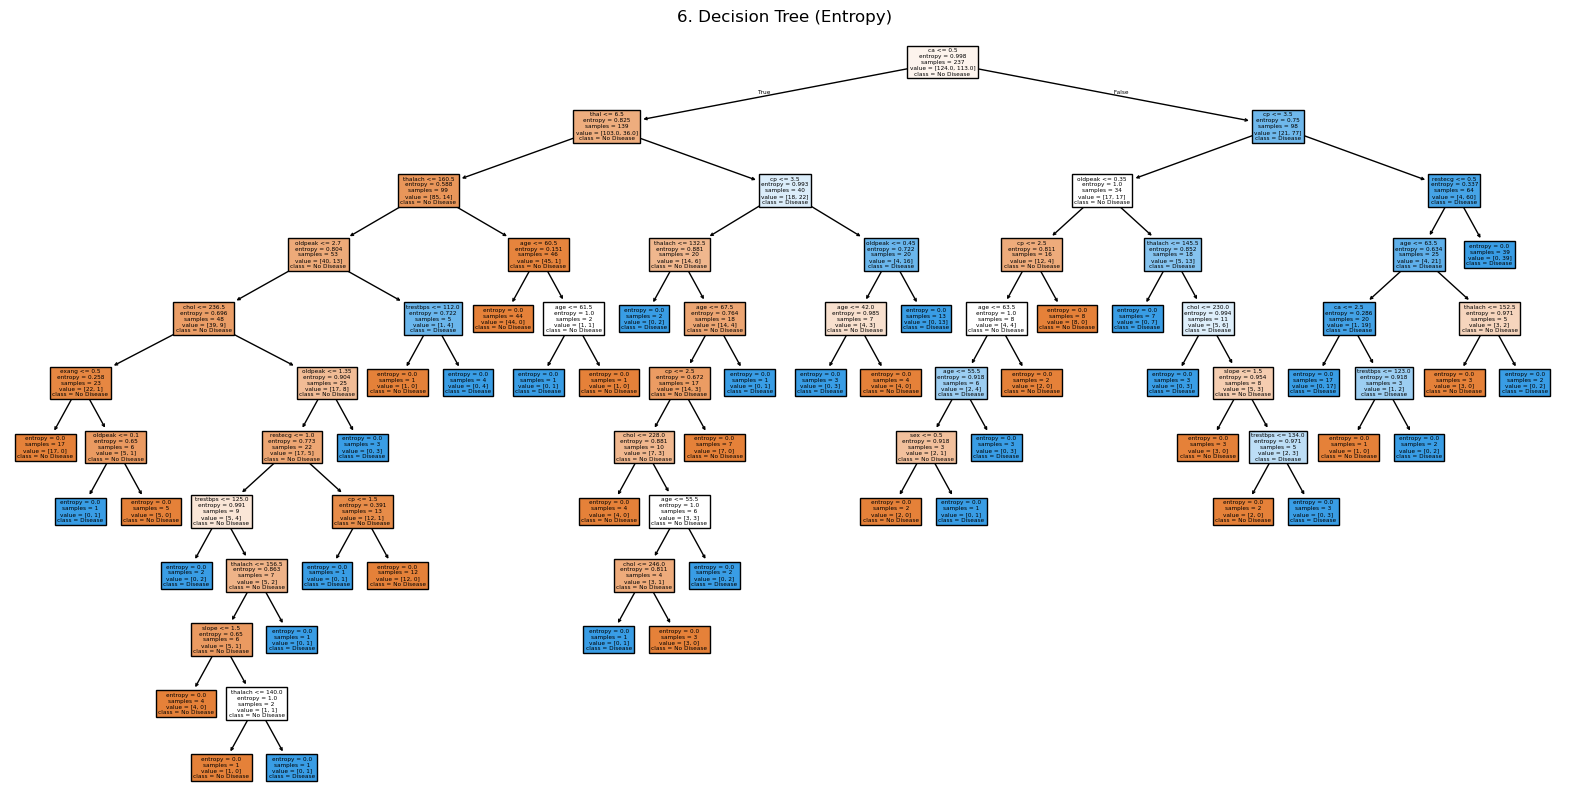


7. Comparison of Decision Tree Model Accuracies:
Gini (default): 0.7833333333333333
Gini (max_depth=3): 0.7833333333333333
Entropy: 0.7833333333333333


In [4]:
# Group Members: Alden Shin-Culhane 501036054, Mustafa Darras 501060306, Ekrem Yilmaz 501108034
# Lab8: Decision Tree Models for Heart Disease Dataset
# Option 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_state = 42

# Read the CSV file while converting '?' to NaN
df = pd.read_csv("heart-disease-dataset2.csv", header=0, na_values=['?'])
print("Available columns in CSV:", df.columns.tolist())

# Rename columns to match expected names: 'tresbps' -> 'trestbps', 'result' -> 'num'
df.rename(columns={"tresbps": "trestbps", "result": "num"}, inplace=True)

# Keep only the 14 required columns
expected_cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
                 "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = df[expected_cols]

# Drop rows with missing values
df.dropna(inplace=True)

# Recode the target variable to binary:
#   0 remains 0 (no disease); any nonzero value becomes 1 (disease)
df["num"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

print("\nDataset shape after dropping missing values:", df.shape)
print(df.head())

# Split the dataset into features (X) and target (y)
X = df.drop("num", axis=1)
y = df["num"]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Requirement 1: Build a decision tree using Gini measure and record accuracy.
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=random_state)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
accuracy_dt_gini = accuracy_score(y_test, y_pred_gini)
print("\n1. Decision Tree (Gini, default): Accuracy =", accuracy_dt_gini)

# Requirement 2: Visualize the decision tree from Question-1.
plt.figure(figsize=(20,10))
plot_tree(dt_gini, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("2. Decision Tree (Gini, default)")
plt.show()

# Requirement 3: Rebuild the decision tree with max_depth=3 (using Gini) and record accuracy.
dt_gini_md3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=random_state)
dt_gini_md3.fit(X_train, y_train)
y_pred_gini_md3 = dt_gini_md3.predict(X_test)
accuracy_dt_gini_md3 = accuracy_score(y_test, y_pred_gini_md3)
print("3. Decision Tree (Gini, max_depth=3): Accuracy =", accuracy_dt_gini_md3)

# Requirement 4: Visualize the decision tree built with max_depth=3.
plt.figure(figsize=(20,10))
plot_tree(dt_gini_md3, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("4. Decision Tree (Gini, max_depth=3)")
plt.show()

# Requirement 5: Build a decision tree using the entropy measure and record accuracy.
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_dt_entropy = accuracy_score(y_test, y_pred_entropy)
print("5. Decision Tree (Entropy): Accuracy =", accuracy_dt_entropy)

# Requirement 6: Visualize the decision tree built using entropy.
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("6. Decision Tree (Entropy)")
plt.show()

# Requirement 7: Compare all three decision trees by printing their accuracies.
print("\n7. Comparison of Decision Tree Model Accuracies:")
print("Gini (default):", accuracy_dt_gini)
print("Gini (max_depth=3):", accuracy_dt_gini_md3)
print("Entropy:", accuracy_dt_entropy)